## Практика


In [30]:
import pandas as pd # библиотека для работы с файлами csv
import numpy as np # линейная алгебра

# Библиотеки для работы с ML
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Библиотеки метрик
from sklearn.metrics import accuracy_score

# Библиотеки визуализации
import matplotlib.pyplot as plt

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

### Задание
Сначала подготовим данные. Выкачаем набор данных, в котором будет прогнозировать, является ли письмо спамом.

Из столбца yesno сделайте столбец spam, где 1 соответствует значению y (является спамом), а 0 – n (не является спамом). Удалите первый столбец (с индексом) и столбец "yesno".

Комбинации признаков должны иметь вид "признак1_признак2".

У Вас остается шесть столбцов-признаков и один столбец spam, который является нашей целевой переменной. Разделим их на x и у.

Теперь мы хотим создать новые признаки путем попарного перемножения уже имеющихся друг на друга. Сколько получится признаков после преобразования (включая те шесть, которые были в исходных данных)?

In [2]:
data = pd.read_csv('spam7.csv')

In [3]:
data['spam'] = data['yesno'].map({'y':1, 'n':0})
data = data.drop(['Unnamed: 0', 'yesno'], axis=1)

data.head()

,crl.tot,dollar,bang,money,n000,make,spam
0,278,0.000,0.778,0.00,0.00,0.00,1
1,1028,0.180,0.372,0.43,0.43,0.21,1
2,2259,0.184,0.276,0.06,1.16,0.06,1
3,191,0.000,0.137,0.00,0.00,0.00,1
4,191,0.000,0.135,0.00,0.00,0.00,1


In [4]:
y = data['spam']
X = data.drop(['spam'], axis=1)

In [5]:
columns = X.columns

In [6]:
for col in columns:
    for coll in columns:
        if (col != coll) and (col+'_'+coll not in X.columns) and (coll+'_'+col not in X.columns):
            X[col+'_'+coll] = X[col] * X[coll]

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   crl.tot         4601 non-null   int64  
 1   dollar          4601 non-null   float64
 2   bang            4601 non-null   float64
 3   money           4601 non-null   float64
 4   n000            4601 non-null   float64
 5   make            4601 non-null   float64
 6   crl.tot_dollar  4601 non-null   float64
 7   crl.tot_bang    4601 non-null   float64
 8   crl.tot_money   4601 non-null   float64
 9   crl.tot_n000    4601 non-null   float64
 10  crl.tot_make    4601 non-null   float64
 11  dollar_bang     4601 non-null   float64
 12  dollar_money    4601 non-null   float64
 13  dollar_n000     4601 non-null   float64
 14  dollar_make     4601 non-null   float64
 15  bang_money      4601 non-null   float64
 16  bang_n000       4601 non-null   float64
 17  bang_make       4601 non-null   f

### Задание
Разделим получившиеся данные на обучающую и тестовую выборки в соотношение 80:20. Обучите модель GradientBoostingClassifier (из библиотеки sklearn) с параметрами по умоляанию (на момент создания урока это learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, min_samples_leaf=1, subsample=1,max_features=None).

Во всех методах, где присутствует случайность, укажите random_state=42.

Это будет наш baseline. Укажите точность accuracy на тестовой выборке (параметр score), округлив до третьего знака после точки-разделителя.

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
baseline = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100,
                                      max_depth=3, min_samples_split=2,
                                      min_samples_leaf=1, subsample=1,
                                      max_features=None, random_state=42)
baseline.fit(X_train, y_train)
y_pred = baseline.predict(X_test)
print("Gradient Boosting:", accuracy_score(y_test, y_pred))

Gradient Boosting: 0.8653637350705755


### Задание
Воспользуйтесь методом feature_importances_. С его помощью вы можете оценить вклад каждого признака в обучение модели. Постройте столбчатую диаграмму, где по горизонтали указаны названия признаков, а по вертикали их важность. В ответе укажите третий по важности признак (без кавычек и пробелов).

Text(0, 0.5, 'Feature Importance Score')

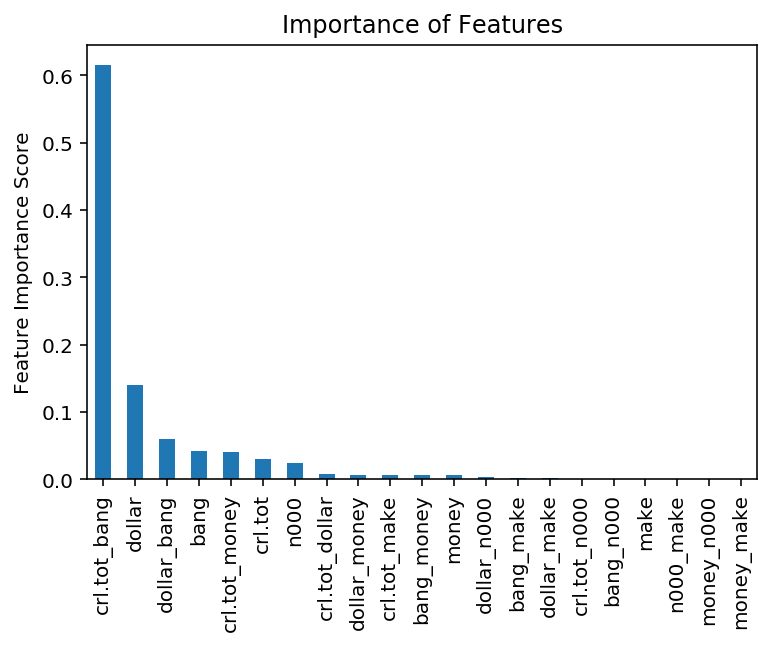

In [21]:
predictors=list(X_train)
feat_imp = pd.Series(baseline.feature_importances_, predictors).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Importance of Features')
plt.ylabel('Feature Importance Score')

### Задание
Теперь перейдем к подбору параметров в модели. Для этого в библиотеке scikit-learn есть метод GridSearchCV. Ему на вход подается модель, список параметров и способ оценивания. При запуске метода fit модель обучается со всеми возможными комбинациями параметров, лучшей комбинацией параметров становятся та, при которой значение метрики максимально.

Укажите в качестве estimator градиетный бустинг с параметрами по дефолту и random_state=42. В параметре scoring укажите 'accuracy', n_jobs=-1, cv=5.

Сетку параметров задайте такой:

param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
              
В ответе укажите точность, округленную до Трёх знаков после точки разделителя, для лучших параметров.

In [24]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1],
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
gridsearch = GridSearchCV(baseline, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
gridsearch.fit(X_train, y_train)
gridsearch.best_score_

0.8836956521739131

In [25]:
gridsearch.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

### Задание
Теперь воспользуемся GridSearchCV для подбора максимальной глубины (max_depth). В качестве estimator используйте градиентный бустинг с раннеее подобранными параметрами и random_state=42. Переберите все значения max_depth от 5 до 15 включительно. В ответ запишите значение параметра, при котором точность максимальна.

In [28]:
gbc = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250,
                                 random_state=42)
depth = {'max_depth':[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}
gridsearch_2 = GridSearchCV(gbc, depth, scoring='accuracy', n_jobs=-1, cv=5)
gridsearch_2.fit(X_train, y_train)
gridsearch_2.best_score_

0.8853260869565217

In [29]:
gridsearch_2.best_params_

{'max_depth': 5}

### Задание
Может показаться, что, научившись запускать готовые фукнции из библиотек и настривать параметры, мы абсолютно готовы к работе. Однако на поле боя нас могут подстерегать еще опасности — legacy code, то есть код, написанный кем-то до вас. Может быть, его можно было бы и улучшить, но на нём уже столько всего надстроено, что переписывать всё практически невозможно.

А ещё часто будет возникать необходимость просто понять код коллеги или сделать code review (грубо говоря, это анализ кода на предмет ошибок и расхождения в стиле). Во всех этих ситуациях необходим навык быcтрого чтения кода.

Поэтому в качестве примера в этом задании мы предлагаем изучить код для реализации AdaBoost с нуля. Вам необходимо запустить эту функцию, но с дописанными строчками (вычисление ошибки и веса алгоритма) на всех признаках, получившихся после всех преобразований в предыдущем датасете (до разделения выборки на обучающую и тестовую). Параметр learning_rate возьмите равным 0.001, М = 10. В ответ запишите точность, округленную до трёх знаков после точки-разделителя.

За основу нужно взять следующий код:

In [32]:
def AdaBoost_scratch(X, y, M=10, learning_rate=1):
    # инициалиазция служебных переменных
    N = len(y)
    estimator_list, y_predict_list, estimator_error_list, estimator_weight_list, sample_weight_list = [], [], [], [], []

    # инициализация весов
    sample_weight = np.ones(N) / N
    sample_weight_list.append(sample_weight.copy())

    # цикл по длине М
    for m in range(M):   

        # обучим базовую модель и получим предсказание
        estimator = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=2)
        estimator.fit(X, y, sample_weight=sample_weight)
        y_predict = estimator.predict(X)

        # Маска для ошибок классификации
        incorrect = (y_predict != y)

        # Оцениваем ошибку
        #estimator_error = TODO 
        estimator_error = np.sum(sample_weight*incorrect)
        
        # Вычисляем вес нового алгоритма
        #estimator_weight =  TODO
        estimator_weight =  learning_rate * np.log((1-estimator_error)/estimator_error)

        # Получаем новые веса объектов
        sample_weight *= np.exp(estimator_weight * incorrect * ((sample_weight > 0) | (estimator_weight < 0)))

        # Сохраяем результаты данной итерации
        estimator_list.append(estimator)
        y_predict_list.append(y_predict.copy())
        estimator_error_list.append(estimator_error.copy())
        estimator_weight_list.append(estimator_weight.copy())
        sample_weight_list.append(sample_weight.copy())
        


    # Для удобства переведем в numpy.array   
    estimator_list = np.asarray(estimator_list)
    y_predict_list = np.asarray(y_predict_list)
    estimator_error_list = np.asarray(estimator_error_list)
    estimator_weight_list = np.asarray(estimator_weight_list)
    sample_weight_list = np.asarray(sample_weight_list)

    # Получим предсказания
    preds = (np.array([np.sign((y_predict_list[:,point] * estimator_weight_list).sum()) for point in range(N)]))
    print('Accuracy = ', (preds == y).sum() / N) 
    
    return estimator_list, estimator_weight_list, sample_weight_list

estimator_list, estimator_weight_list, sample_weight_list  = AdaBoost_scratch(X, y, M=10, learning_rate=0.001)

Accuracy =  0.8228645946533363
